In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm




In [2]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4','mean_PO4', 'mean_Chlor', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7')

## Change all na values to NA
df = pd.read_table('Analysis.txt' ,sep='\s+', names=names , na_values='XXXXXXX')

## Change data from objects to categorical
df.Season = pd.Categorical(df.Season, categories=['spring', 'summer', 'autumn', 'winter'], ordered=True)
df.Size = pd.Categorical(df.Size, categories=['small', 'medium', 'large'], ordered=True)
df.Speed = pd.Categorical(df.Speed, categories=['low', 'medium', 'high'], ordered=True)

## Check how many NA a specific row contains
## df.isna().sum(axis=1).value_counts()

## remove any rows that contain more than 6 NA
df = df.loc[df.isna().sum(axis=1)<6].copy()


## df.isna().sum(axis=1).value_counts()

## Check which rows contain rest of NA
df.loc[df.isna().sum(axis=1) > 0]

## We can see from the table that mean_Cl and mean_Chlor contain a substantial amount of NA and max_pH , min_02 and mean_P04 have one NA value each , we will adress these NA values in the next cells


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
27,autumn,small,high,6.80,11.1,9.000,0.630,20.0,4.000,NaN,2.70,30.3,1.9,0.0,0.0,2.1,1.4,2.1
37,spring,small,high,8.00,NaN,1.450,0.810,10.0,2.500,3.000,0.30,75.8,0.0,0.0,0.0,0.0,0.0,0.0
47,winter,small,low,NaN,12.6,9.000,0.230,10.0,5.000,6.000,1.10,35.5,0.0,0.0,0.0,0.0,0.0,0.0
54,winter,small,high,6.60,10.8,NaN,3.245,10.0,1.000,6.500,NaN,24.3,0.0,0.0,0.0,0.0,0.0,0.0
55,spring,small,medium,5.60,11.8,NaN,2.220,5.0,1.000,1.000,NaN,82.7,0.0,0.0,0.0,0.0,0.0,0.0
56,autumn,small,medium,5.70,10.8,NaN,2.550,10.0,1.000,4.000,NaN,16.8,4.6,3.9,11.5,0.0,0.0,0.0
57,spring,small,high,6.60,9.5,NaN,1.320,20.0,1.000,6.000,NaN,46.8,0.0,0.0,28.8,0.0,0.0,0.0
58,summer,small,high,6.60,10.8,NaN,2.640,10.0,2.000,11.000,NaN,46.9,0.0,0.0,13.4,0.0,0.0,0.0
59,autumn,small,medium,6.60,11.3,NaN,4.170,10.0,1.000,6.000,NaN,47.1,0.0,0.0,0.0,0.0,1.2,0.0
60,spring,small,medium,6.50,10.4,NaN,5.970,10.0,2.000,14.000,NaN,66.9,0.0,0.0,0.0,0.0,0.0,0.0


count    198.000000
mean       8.019975
std        0.588669
min        5.600000
25%        7.705000
50%        8.060000
75%        8.400000
max        9.700000
Name: max_pH, dtype: float64

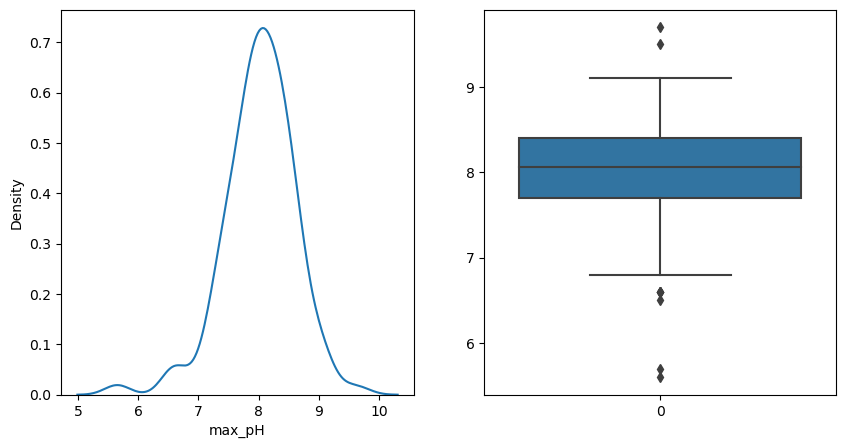

In [131]:
## Dealing with max_pH NA values
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(ax=ax1, data=df.max_pH)

## kde (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the realtive likelihood of a random number being close to the sample
## the highest likelihood looks to be around 8  

sns.boxplot(ax=ax2, data=df.max_pH)

display(df["max_pH"].describe())

## From the boxplot we can see that the median value is roughly 8 aswell and a a few outliers are present on each side 
## In this case it would be appropriate to replace any missing value with the median or median as the mean is relative close to the median

## Replacing missing pH values with the mean pH
df.max_pH.fillna(df.max_pH.mean(), inplace=True)


##plt.hist(df['max_pH'])
##plt.kde(df['max_pH'])


count    198.000000
mean      13.542096
std       20.055870
min        0.200000
25%        2.112500
50%        5.475000
75%       17.200000
max      110.456000
Name: mean_Chlor, dtype: float64

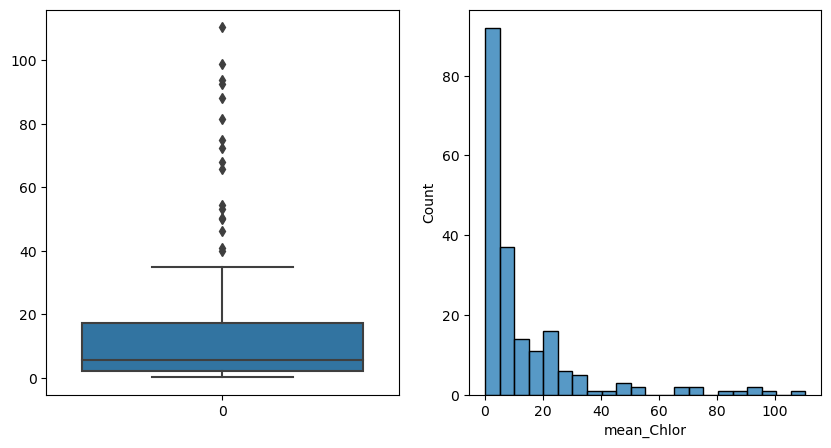

In [147]:
##mean_Chlor
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))


sns.boxplot(ax=ax1, data=df.mean_Chlor)
sns.histplot(ax=ax2, data=df.mean_Chlor)

display(df["mean_Chlor"].describe())

## data on both plots is clustered around the left side showing an uneven distribution so the mean would not be a good representative of the central location
## we will use the median to replace all NA values

df.mean_Chlor.fillna(df.mean_Chlor.median(), inplace=True)

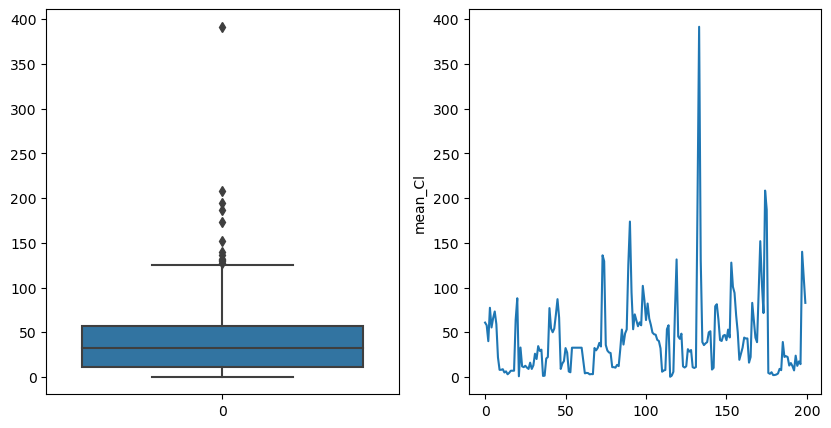

In [145]:
##mean_Cl
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=ax1, data=df.mean_Cl)
sns.lineplot(ax=ax2, data=df.mean_Cl)

## Similarly to mean_Chlor the values are clustere around the left side showing an uneven distributuon , 
## so in this case using the median would also be a better representation of the central location to replace NA values.

df.mean_Cl.fillna(df.mean_Cl.median(), inplace=True)


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7


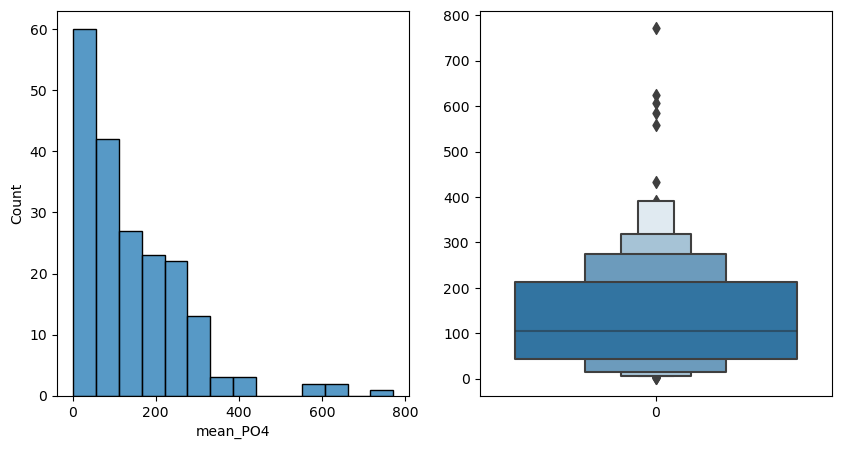

In [144]:
##mean_P04
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(ax=ax1, data=df.mean_PO4)
sns.boxenplot(ax=ax2, data=df.mean_PO4)

## yet again values seem to be clustered around the left side suggesting an uneven distributio so the median would be a preferable replacement for any NA values
df.mean_PO4.fillna(df.mean_PO4.median(), inplace=True)

## Check if there are any NA values left 
df.loc[df.isna().sum(axis=1) > 0]








,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7


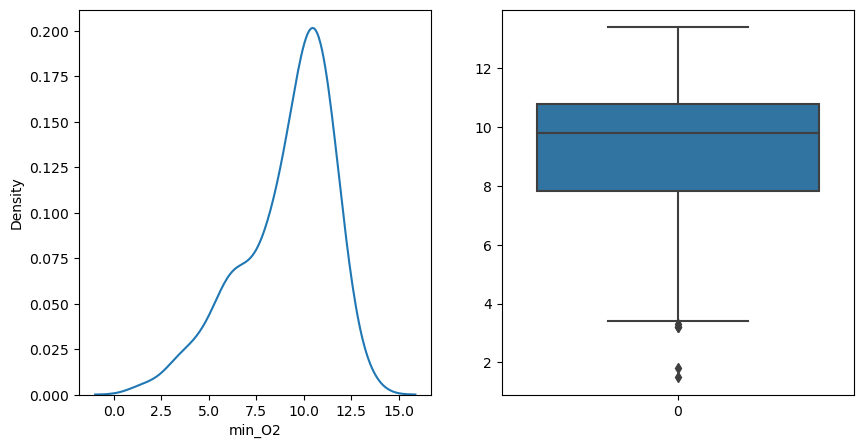

In [149]:
## min_O2
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))


sns.kdeplot(ax=ax1, data=df.min_O2)

## kde (Kernel Density Estimation) estimates the pdf (probability density function) and from the plot below we can deduct the realtive likelihood of a random number being close to the sample
## the highest likelihood looks to be just abit over 10 

sns.boxplot(ax=ax2, data=df.min_O2)

## From the boxplot we can see that the median vaue is a bit under 10 
## In this case it would be appropriate to replace any missing value with the mean as it has a better indication of being closer to the sample  

## replace min_O2 value with mean 
df.min_O2.fillna(df.min_O2.mean(), inplace=True)

## Check for if we missed any NA values 
df.loc[df.isna().sum(axis=1) > 0]



,a1,a2,a3,a4,a5,a6,a7
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,16.996465,7.470707,4.334343,1.997475,5.115657,6.004545,2.487374
std,21.421713,11.065461,6.976788,4.439205,7.511846,11.711053,5.181536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.950000,3.000000,1.550000,0.000000,2.000000,0.000000,1.000000
75%,24.800000,11.275000,4.975000,2.400000,7.500000,6.975000,2.400000
max,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


a1    3365.3
a2    1479.2
a3     858.2
a4     395.5
a5    1012.9
a6    1188.9
a7     492.5
dtype: float64

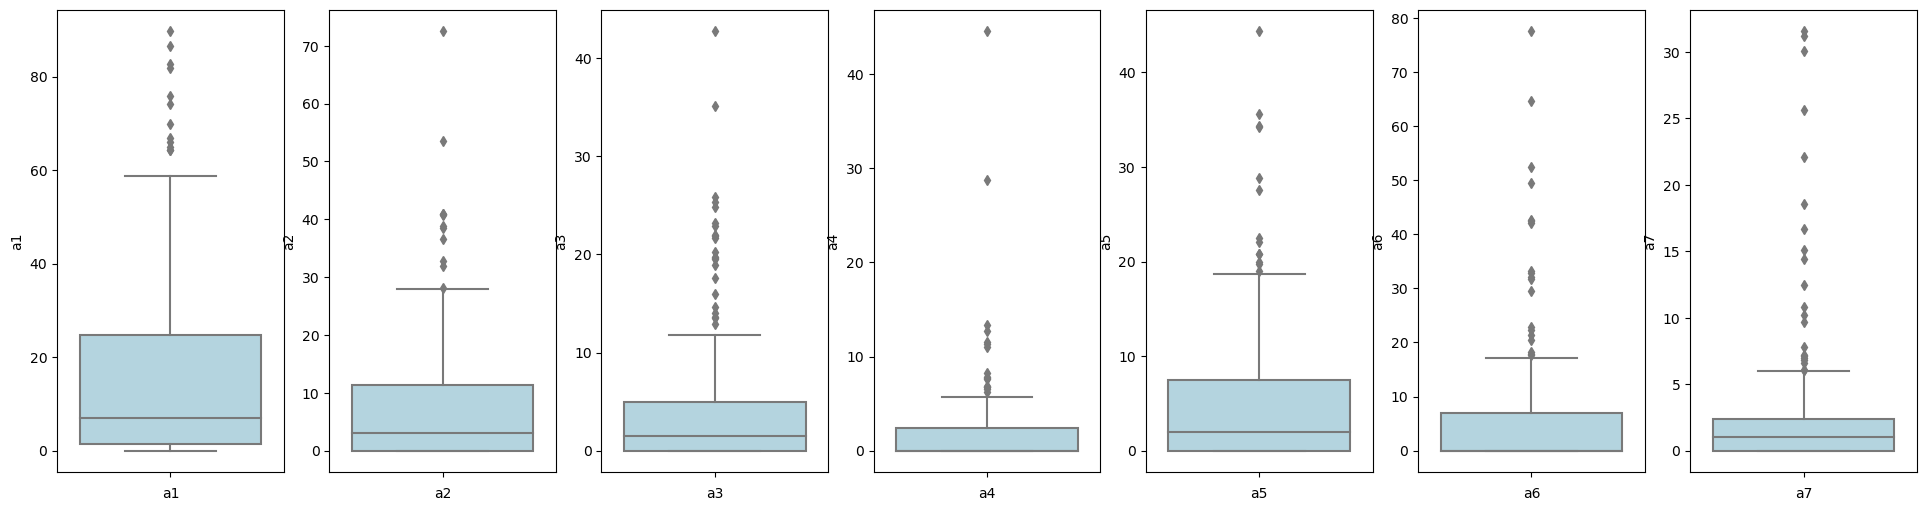

In [8]:
algae = ['a1','a2','a3','a4','a5','a6','a7']

fig, axs = plt.subplots(1, 7, figsize=(24,6))
for k, c in enumerate(algae):
    sns.boxplot(data=df, y=c, color="lightblue", ax=axs[k])
    axs[k].set_xlabel(c)

plt.show

display(df[algae].describe())
display(df[algae].sum(axis=0))


## From the table and plots below we can see that a1 has the highest standard deviation which means that there is more variablility and spread in the data
## A1 also has the highest max frequency and highest total_coutn as seen from the two tables bewlow , we will use a1 as a target as its has the highes inetrquartile range and is more spread out 
## We will also use a4 as a target as it ahs the lowest frequency out of all the algae and smallest standard deviation , comparison between the two algae should be interesting


<AxesSubplot:xlabel='Speed', ylabel='a4'>

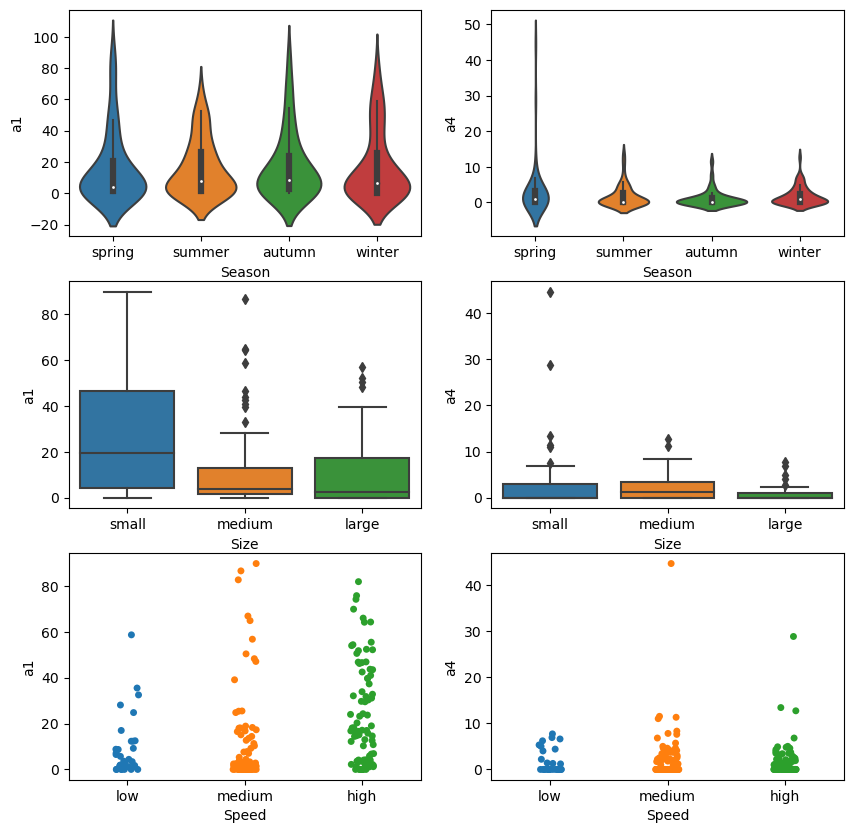

In [94]:
## Check for certain features that might be related to the target

## Check season 
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sns.violinplot(ax=axes[0,0], x=df.Season , y=df.a1 )
sns.violinplot(ax=axes[0,1], x=df.Season , y=df.a4 )


## a1
## From the violinplot we can see that there is no clear indication of the season affecting the algae count and all 4 seasons have similar median and inetrquartile ranges
## There is nothing idicative of a relationship between the frequency of algea and the season so we wont look into this anymore 
## a4
## From the violinplot we see that the highest frequency of a4 is a lot lower than that of a1 and that spring has a significant outlier however the case is the same here as with a1 the median and 
## interquartile ranges in a4 are similar between the seasons indicationg that there is no relationship betweeen season and algae frequency , so we wont be looking into this any further
    
    
## Check size 
sns.boxplot(ax=axes[1,0], x=df.Size , y=df.a1)
sns.boxplot(ax=axes[1,1], x=df.Size , y=df.a4)

## A1
## Looking at the boxplot we can  clearly that smaller rivers  have have a higher frequency of algae than the others and could argue that medium does have a slighly higher frequency than large
## As there is a possible relation between frequency of algea and size of the river we should look into this further

## A4
## Similarly to a1 it looks like there is a relationship between the size of the river and the frequency of algea as smaller areas seeem to have a higher frequency and larger areas tend 
## to have a smaller frequencies


## Check speed 
sns.stripplot(ax=axes[2,0] ,data=df , x="Speed" , y="a1")
sns.stripplot(ax=axes[2,1] ,data=df , x="Speed" , y="a4")

## A1
## From the stripplot we can see that the frequency increases as the speed of the river increaess and the distribution becomes more widespread 
## It looks as there is a potentail relationship between the speed and frequency of algea and therfore should be investigated further



## A4
## Unlike a1 there seems to be very little difference in the distribution and frequency of a4 algea bar the handful of outliers , nothing in the stripplot points to a 
## relationship of the river speed and algea a4 , therefore it should no longer be investigated




,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
max_pH,1.000000,-0.148528,0.152562,-0.145182,0.026160,0.290245,0.213668,0.367930,-0.247787,0.477671,0.147193,-0.291257
min_O2,-0.148528,1.000000,-0.387237,0.059282,-0.343361,-0.452759,-0.511890,-0.203812,0.278605,-0.182071,-0.299230,-0.390906
mean_Cl,0.152562,-0.387237,1.000000,0.524604,0.562692,0.633095,0.678445,0.551625,-0.524848,0.333565,0.079313,0.212681
mean_NO3,-0.145182,0.059282,0.524604,1.000000,0.425010,0.432303,0.447496,0.341653,-0.382403,0.126763,-0.011824,0.045360
mean_NH4,0.026160,-0.343361,0.562692,0.425010,1.000000,0.603157,0.644626,0.384227,-0.449194,0.185324,-0.028612,0.301659
mean_oPO4,0.290245,-0.452759,0.633095,0.432303,0.603157,1.000000,0.910464,0.483516,-0.671019,0.391014,0.179297,0.150506
mean_PO4,0.213668,-0.511890,0.678445,0.447496,0.644626,0.910464,1.000000,0.523274,-0.655494,0.363712,0.191543,0.215420
mean_Chlor,0.367930,-0.203812,0.551625,0.341653,0.384227,0.483516,0.523274,1.000000,-0.520324,0.436144,-0.029545,0.022222
a1,-0.247787,0.278605,-0.524848,-0.382403,-0.449194,-0.671019,-0.655494,-0.520324,1.000000,-0.277781,-0.138834,-0.061906
a2,0.477671,-0.182071,0.333565,0.126763,0.185324,0.391014,0.363712,0.436144,-0.277781,1.000000,0.263219,-0.271549


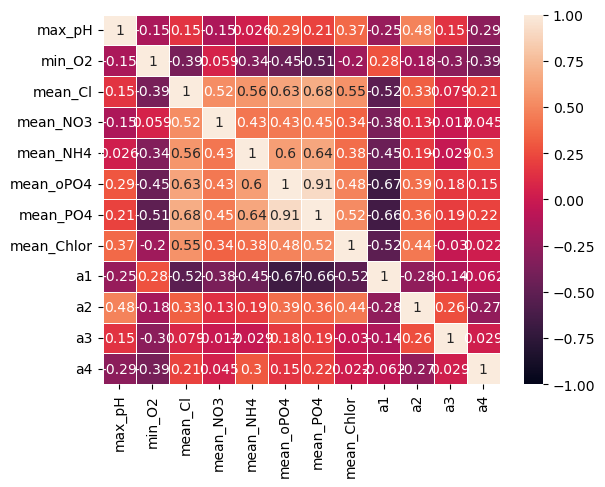

In [116]:
## Using Spearman’s Rank Coefficient to Identify addiontal feature relationships with target a1columns = df.columns[:12]
columns = df.columns[:15]
SpearCorr = df[columns].corr(method='spearman')

ax = sns.heatmap(SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5)

SpearCorr


## From the Spearman’s heatmap we can see a strong coreleation of a1 with mean_PO4 , mean_oPO4 , mean_Cl and mean_Chlor
## a4 also has mid level of corelation with min_02

interval columns not set, guessing: ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor', 'a1', 'a2', 'a3', 'a4']


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
Season,1.000000,0.000000,0.000000,0.000000,0.347767,0.000000,0.000000,0.034202,0.000000,0.113527,0.016717,0.000000,0.235722,0.180030,0.000000
Size,0.000000,1.000000,0.620101,0.655207,0.271610,0.295083,0.182410,0.000000,0.000000,0.521392,0.219744,0.353390,0.301927,0.288757,0.000000
Speed,0.000000,0.620101,1.000000,0.445096,0.438738,0.329001,0.000000,0.101348,0.483298,0.591471,0.488537,0.369374,0.248468,0.064351,0.054338
max_pH,0.000000,0.655207,0.445096,1.000000,0.129955,0.000000,0.000000,0.000000,0.000000,0.128623,0.441149,0.372031,0.231549,0.000000,0.493595
min_O2,0.347767,0.271610,0.438738,0.129955,1.000000,0.357181,0.000000,0.416979,0.492317,0.536612,0.337781,0.000000,0.118330,0.225246,0.293585
mean_Cl,0.000000,0.295083,0.329001,0.000000,0.357181,1.000000,0.247831,0.096017,0.450261,0.479983,0.244433,0.000000,0.000000,0.000000,0.000000
mean_NO3,0.000000,0.182410,0.000000,0.000000,0.000000,0.247831,1.000000,0.642789,0.158463,0.260486,0.376033,0.000000,0.000000,0.000000,0.000000
mean_NH4,0.034202,0.000000,0.101348,0.000000,0.416979,0.096017,0.642789,1.000000,0.734681,0.776305,0.201509,0.000000,0.000000,0.000000,0.621800
mean_oPO4,0.000000,0.000000,0.483298,0.000000,0.492317,0.450261,0.158463,0.734681,1.000000,0.954537,0.000000,0.000000,0.115687,0.000000,0.693140
mean_PO4,0.113527,0.521392,0.591471,0.128623,0.536612,0.479983,0.260486,0.776305,0.954537,1.000000,0.241126,0.212924,0.000000,0.415022,0.700802


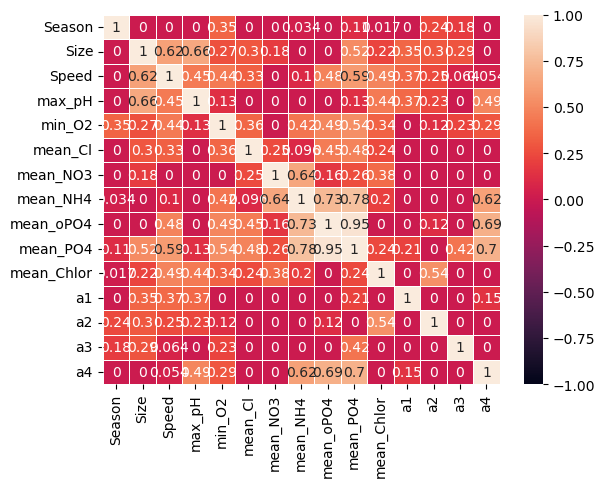

In [113]:
## Using Phiks Correlation Coefficient to Identify addiontal feature relationships with target a1 (includes categorical valeus)

import phik
columns = df.columns[:15]
PhikCorr = df[columns].phik_matrix()

ax = sns.heatmap(PhikCorr, annot=True, vmin=-1 , vmax=1,  linewidths=0.5)


PhikCorr

## From  Phicks corelation heatmap we can see a coreleation of a1 with Size , Speed and max_pH
## a4 has a really storng corelation with mean_NH4, mean_oPO4, mean_PO4 and max_pH , however very little or none with the size and speed so we can disregard our previous hypothesis

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4
max_pH,1.000000,-0.167980,0.133115,-0.130762,-0.093521,0.158769,0.180692,0.391434,-0.268539,0.326085,0.030987,-0.248611
min_O2,-0.167980,1.000000,-0.277485,0.099335,-0.087464,-0.415516,-0.486317,-0.165868,0.280021,-0.098409,-0.250715,-0.314556
mean_Cl,0.133115,-0.277485,1.000000,0.225041,0.074075,0.392307,0.456521,0.150828,-0.360781,0.089498,0.094297,0.120459
mean_NO3,-0.130762,0.099335,0.225041,1.000000,0.721444,0.144588,0.169314,0.142910,-0.241211,0.023688,-0.076214,-0.025783
mean_NH4,-0.093521,-0.087464,0.074075,0.721444,1.000000,0.227237,0.208444,0.093751,-0.132656,-0.029683,-0.101440,0.228229
mean_oPO4,0.158769,-0.415516,0.392307,0.144588,0.227237,1.000000,0.913878,0.129416,-0.417358,0.147690,0.033629,0.295746
mean_PO4,0.180692,-0.486317,0.456521,0.169314,0.208444,0.913878,1.000000,0.267589,-0.487301,0.162470,0.065873,0.304626
mean_Chlor,0.391434,-0.165868,0.150828,0.142910,0.093751,0.129416,0.267589,1.000000,-0.283800,0.381923,-0.049759,-0.083646
a1,-0.268539,0.280021,-0.360781,-0.241211,-0.132656,-0.417358,-0.487301,-0.283800,1.000000,-0.292520,-0.146950,-0.038924
a2,0.326085,-0.098409,0.089498,0.023688,-0.029683,0.147690,0.162470,0.381923,-0.292520,1.000000,0.030311,-0.171682


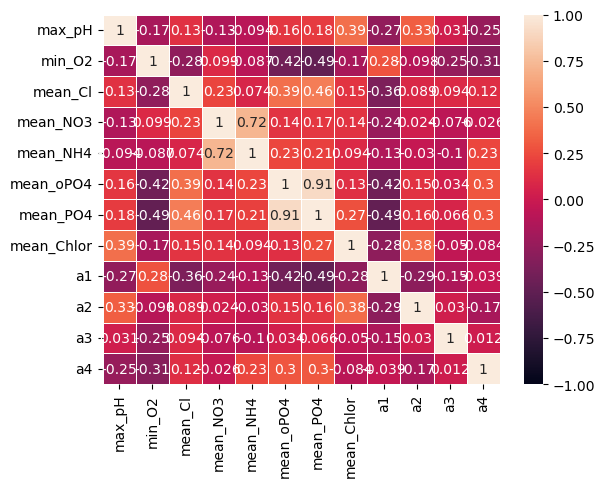

In [114]:
## Using Pearson’s Correlation Coefficient to Identify addiontal feature relationships with target a1

columns = df.columns[:15]
PearsonCorr = df[columns].corr()

ax = sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5)
PearsonCorr

## From  Phicks corelation heatmap we can see yeat again a coreleation of a1 with mean_Cl, mean_oPO4 and mean_PO4
## a4 once again shows its strongest corelation with min_O2 , mean_oPO4 and mean_PO4

In [15]:
## Finalised list from 3 different corealation coefficients : 

## A1
## Numerical : mean_PO4 , mean_oPO4, mean_Cl,mean_Chlor and max_pH
## Categorical : Size and Speed

## A4 
## Numerical : mean_NH4, mean_oPO4 and mean_PO4 , max_pH and min_O2

<AxesSubplot:xlabel='min_O2', ylabel='a4'>

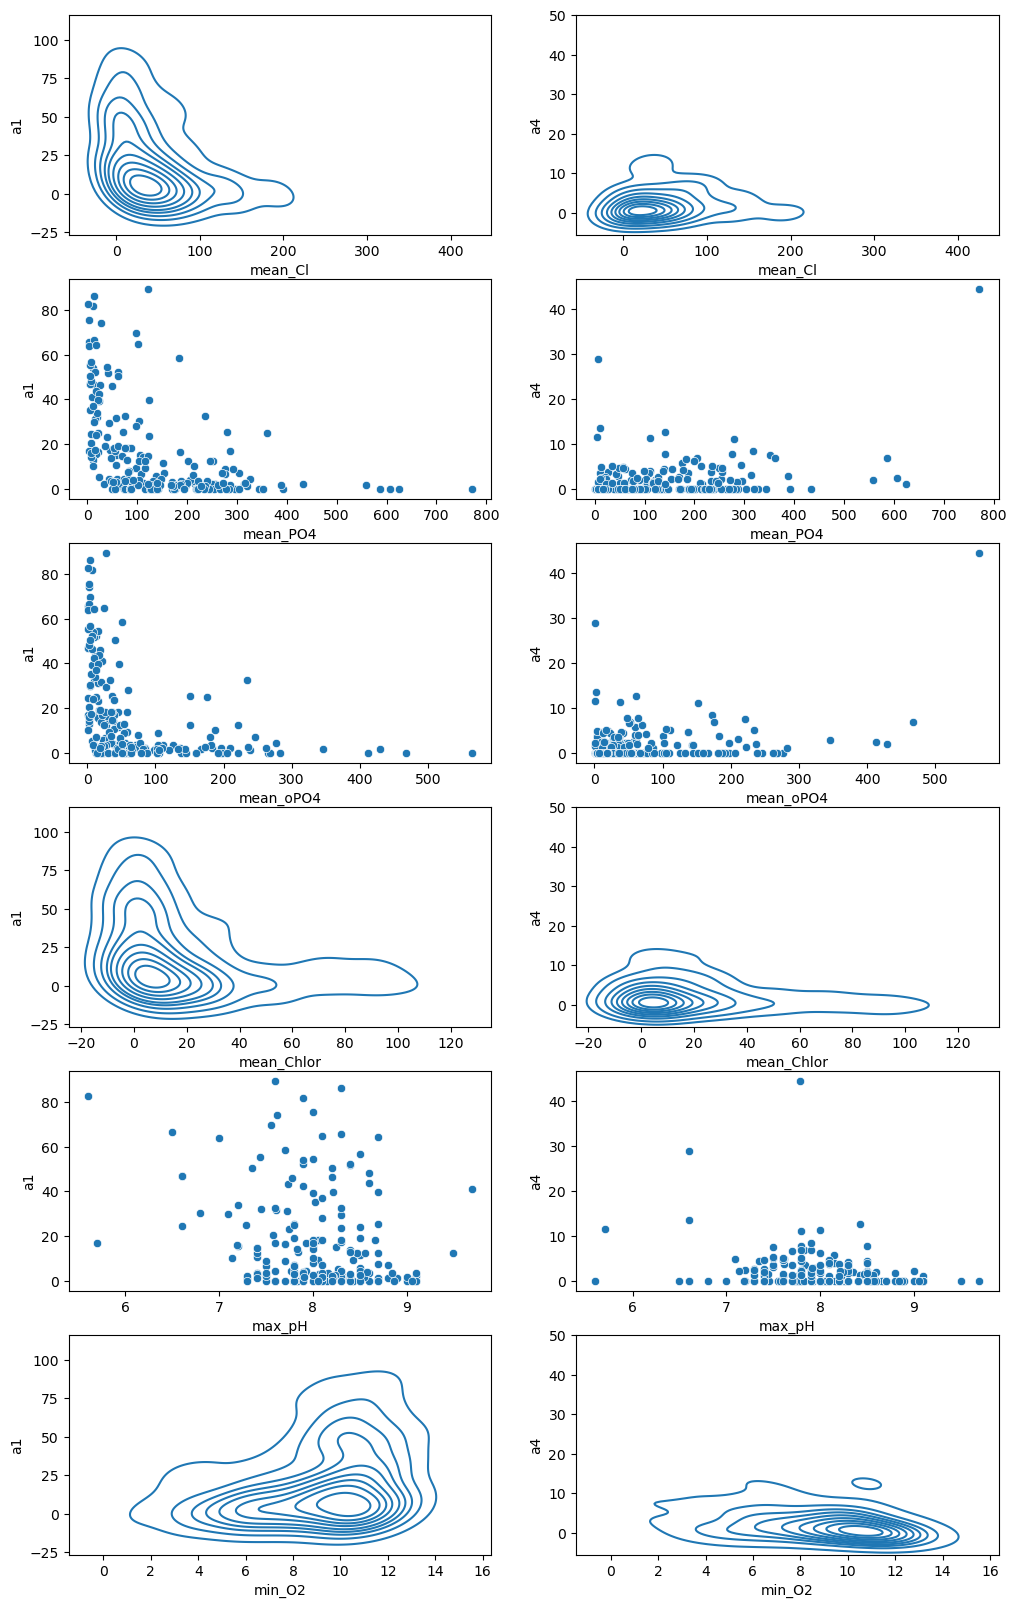

In [171]:
fig, axes = plt.subplots(6 , 2, figsize=(12, 20))

sns.kdeplot(ax=axes[0, 0], x=df.mean_Cl, y=df.a1)
sns.kdeplot(ax=axes[0, 1], x=df.mean_Cl, y=df.a4,)

sns.scatterplot(ax=axes[1, 0], x=df.mean_PO4, y=df.a1)
sns.scatterplot(ax=axes[1, 1], x=df.mean_PO4, y=df.a4)

sns.scatterplot(ax=axes[2, 0], x=df.mean_oPO4, y=df.a1)
sns.scatterplot(ax=axes[2, 1], x=df.mean_oPO4, y=df.a4)

sns.kdeplot(ax=axes[3, 0], x=df.mean_Chlor, y=df.a1)
sns.kdeplot(ax=axes[3, 1], x=df.mean_Chlor, y=df.a4)

sns.scatterplot(ax=axes[4, 0], x=df.max_pH, y=df.a1)
sns.scatterplot(ax=axes[4, 1], x=df.max_pH, y=df.a4)

sns.kdeplot(ax=axes[5, 0], x=df.min_O2, y=df.a1)
sns.kdeplot(ax=axes[5, 1], x=df.min_O2, y=df.a4)




## A1
## From the mean_Cl, mean_PO4, mean_oPO4 and mean_Chlor scatterplots we see that most of the data is clustered on the left side both high and low and as we move more right it tends to move lower.
## This means that the lower values of those chemicals can lead to a higher frequency of algea and as you increase those chemical values then the frequency of algea decreases 
## As for the max_pH scatterplot we can see that most of the data is clustered between ~7 and ~9 witha few outliers, this means that algea is most likely to be presnet in the river if the pH level is between those two.
## A pH level of below 7 or above 9 would be recommended to decrease the frequency of algea


## A4
## We can see straight away that the frequency of the a4 algae is much lower. This would suggest that this algea type is rare. This can be best seen on the scatterplot of max_pH 
## and comparing it to the one of a1 to see the difference of frequency at the same ph_levels
## Looking at the  pO4 and oPO4 scatterplots for a4 it seems like the algea can withstand a higher amount of these checmicals when compared to a1 , you can see this by the 
## higher frequencies as the chemical amount increases. This algea also has a much lower min_O2 level than a1 which means it has a better chance of survival in waters with smaller amounts of oxygen
## however mean_cl and mean_Chlor scatterplots also show that algae a4 has trouble with thriving in rivers with those chemicals as the count and frequenct is substatntially lower
## than that of a1


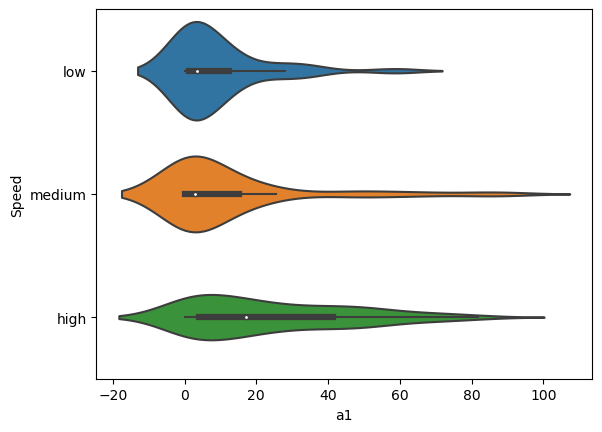

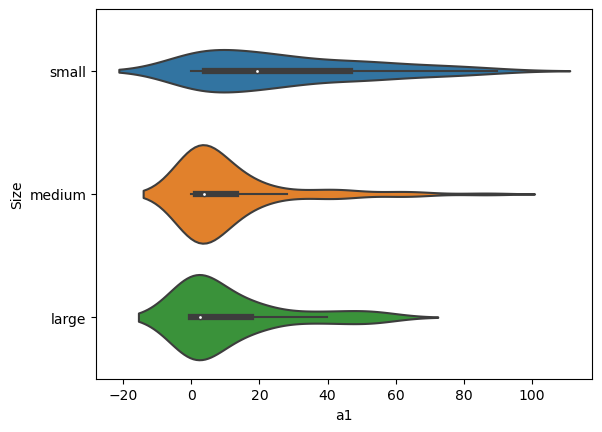

In [17]:
sns.violinplot( x=df.a1, y=df.Speed, s=5 ,)
plt.show()

sns.violinplot( x=df.a1, y=df.Size, s=5)
plt.show()

## From the Speed violinplot we can  see that if the speed is lower then there is a higher probablity of having a low frequency of algea when compared to medium and high
## Medium speed  has a slightly lower probability of having a low frequency of algea when comapred to low speed however it also has a higher probability of having a higher frequency of algea
## High speed has the lowest probability of having a small amount of algea however it has a way higher probability of having a high frequeny this is especially obvious as its interquartile range is significantly
## bigger than low and medium  and its median also looks to be double that of low and medium speeds
## we can conclude that lower speed would mean a lower frequency  of algea.


## The small size has a smaller probability of having a lower frequency of algea however it also has a higher probability of higher algea frequency
## medium has a higher chance of having a lower frequency of algea when compared to small howver the probability of it having a higher algea frequcny is lower that that of small
## large has a similar chance as medium of having a lower frequncy of algea howevr the chances of havinba higher amount of algea is lower

## We can conclude that larger ponds have a higher probability of having algea however they have a low probability of having a high frequency of it 

In [18]:
## Conclusion

## A1

## From the findings above we can conclude that :
##  River speed does affect this algea. The probability of this algea is relatively equal among the 3 speeds , however the higher the speed of the rive the more likely it is that algea will develop with higher frequencies
##  River size also affect algea , similarly enough to speed the possibity of algea developing is relively similar in all 3 sizes howver small rivers have a higher probability of having higher frequencies
## Small and high speed rivers have the highest chance of developing algea with a high frequency

## This algea can withstand a small amount of checmicals , however once PO4, oPO4, Cl or Chlor is added the frequency of this algea decreases quite significantly. It was also noted that this algea thrives in a river with a ph level between 7 and 9.
## Rivers with a high trace of any of the chemicals mentioned above or very acidic or basic pH levels would have a very low frequency of algae
## One could describe this as a highly spreading algea with a quick treatment

## A4
## It was suprising that neither the river speed or size affected this algea perhaps this is due to the rarity of this algea as it was only ever seen in lower frequencies.
## This algea could withstand a higher value of PO4 and oPO4 chemicals as the frequency didnt drop as dramatically as these checmicals increased , however Cl and Chlor caused the algea frequency to decrease as it increased.
## This algea could thrive in rivers of all speeds and sizes that contained oPO4 and PO4 and it would take Cl , Chlor or a vert acidic or basic pH level to remove this algea.
## This algea could be seen as a rare mutated variant(due to its low frequency) that grew immune to speed and size of rivers and the oPO4 and pO4 chemicals. The fact that this algea can survive on lower amounts of oxygen than a2 could also point to it being a mutation.

## General
## It was very suprising that the seasons had no corelation to the frequency of algea as one would think it would thrive in warm climates (summer) with a longer exposure to light (summer) , however this was no the case at all and very little to no difference was seen between all 4 seasons

